In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('demo_style.mplstyle')

In [2]:
#get job info

import os

os.environ["SLURM_JOB_ID"]

'587474'

In [3]:
#load our saved autoencoder

#model trained with data downsampled by 5 (had to rerun quickly so that's what we have)

from tensorflow.keras.models import load_model

encoder = load_model('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/encoder_model_n5.h5')

encoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 320000)]          0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
Total params: 40,971,128
Trainable params: 40,971,128
Non-trainable params: 0
_________________________________________________

In [4]:
#load our kmeans labels

q003_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q003_kmeans_labels_nocurrent.npy')
q103_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q103_kmeans_labels_nocurrent.npy')

In [5]:
#now load our data

q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
q003_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_max.npy')
q003_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_norm.npy')

q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 
q103_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_max.npy')
q103_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_norm.npy')

qall_data = np.concatenate((q003_data, q103_data), axis=0)

In [6]:
#put all the data in the encoder

qall_reshape = qall_data.reshape((len(qall_data), np.prod(qall_data.shape[1:])))
encoded_all = encoder.predict(qall_reshape)



In [7]:

#Try pca on encoded images why not
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#need to flatten i guess?
img_pca = pca.fit_transform(encoded_all)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['red','blue']
color_label=[]
for i in range(qall_data.shape[0]):
    if i < boundary1:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])
        
print(len(color_label))   
print(len(img_pca))

9787
9787


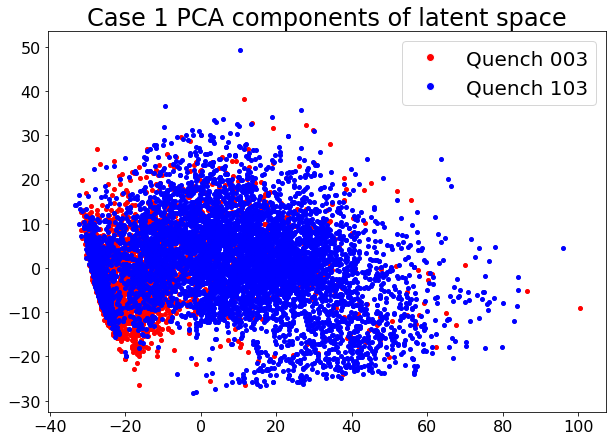

<Figure size 720x504 with 0 Axes>

In [8]:
#try making a nicer figure for maxim

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

msize = 16

#hack the legend together
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Quench 003',
                          markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Quench 103',
                          markerfacecolor='blue', markersize=8)]

# Create the figure and add our hacked legend
plt.figure(figsize=(10, 7))
for i in range(qall_data.shape[0]):
    plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
plt.title('Case 1 PCA components of latent space')
plt.legend(handles=legend_elements)
plt.show()
plt.savefig("pca_norm.png")

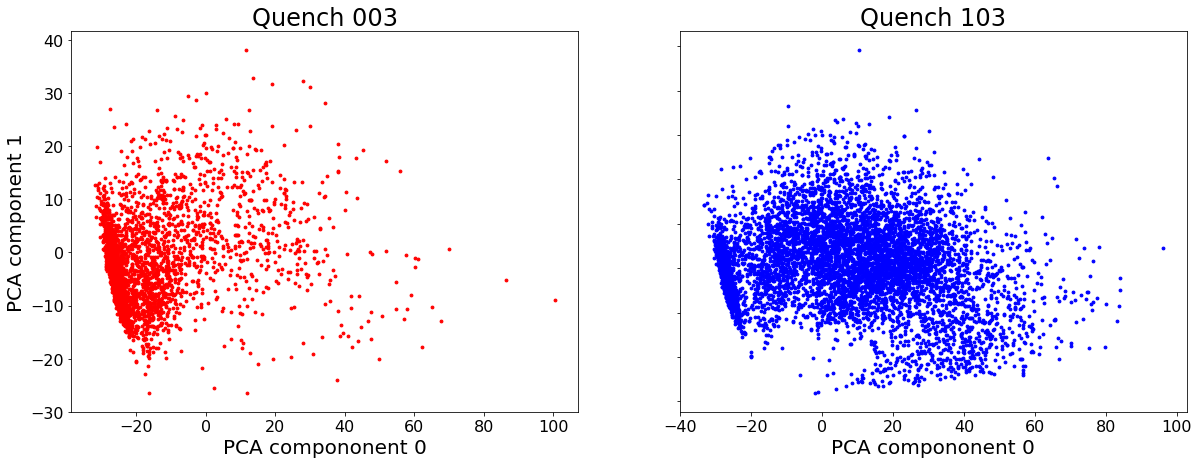

In [9]:
#make the same plot but show all quenches separately

msize = 8

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(qall_data.shape[0]):
    if color_label[i] == 'red':
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

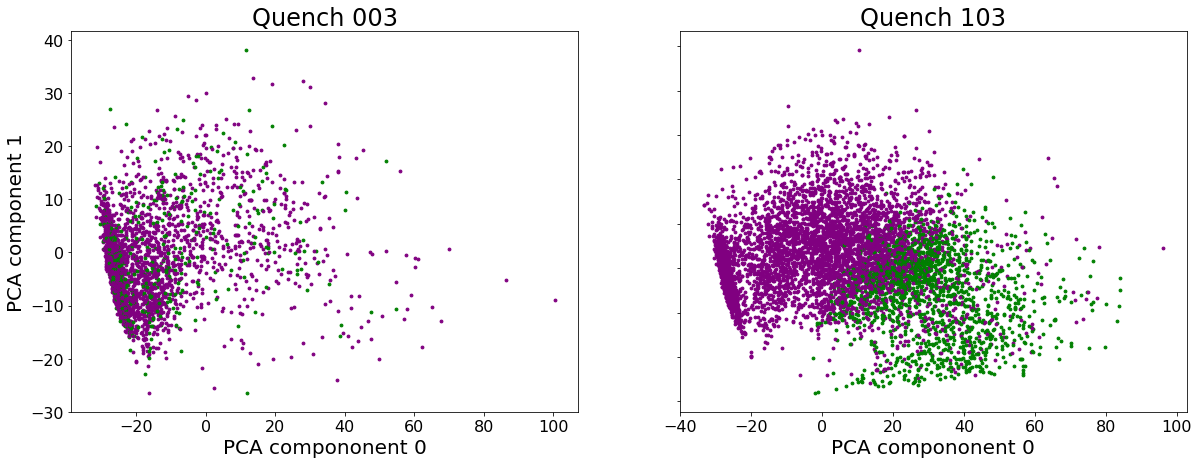

In [10]:
#now make a new plot but where the labels are our kmeans labels, not our autoencoder cluster

qall_labels = np.concatenate((q003_labels, q103_labels), axis=0)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['purple','green']
color_label=[]
for label in qall_labels:
    if label == 0:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])

msize = 8

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(qall_data.shape[0]):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
